# Linear Regression

## Via sklearn

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

In [4]:
model = LinearRegression().fit(x, y)

In [5]:
r_sq = model.score(x,y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7158756137479542
intercept: 5.633333333333329
slope: [0.54]


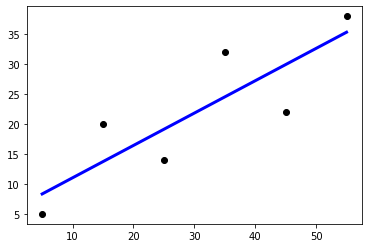

In [57]:
plt.scatter(x, y, color='black')
plt.plot(x, model.predict(x), color='blue', linewidth=3 )
plt.show()

## Via pandas

In [7]:
import pandas as pd

In [47]:
data = pd.read_csv( './data/shopping_trends.csv')

In [48]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [49]:
data.

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


## Via stats models (synthetic data)

In [95]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

### multivariate linear example

In [90]:
nsample = 100
x = np.linspace(0, 10, 100)
X = np.column_stack((x, x ** 2))
beta = np.array([1, 0.1, 10])
e = np.random.normal(size=nsample)


In [91]:
X = sm.add_constant(X)
y = np.dot(X, beta) + e

In [97]:
model = sm.OLS(y, X)
results = model.fit();
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.244e+06
Date:                Sun, 05 Nov 2023   Prob (F-statistic):          1.51e-248
Time:                        11:21:11   Log-Likelihood:                -124.53
No. Observations:                 100   AIC:                             255.1
Df Residuals:                      97   BIC:                             262.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3850      0.251      5.518      0.0

In [ ]:
plt.plot()

### non-linear example

In [98]:
nsample = 50
sig = 0.5
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, np.sin(x), (x - 5) ** 2, np.ones(nsample)))
beta = [0.5, 0.5, -0.02, 5.0]

y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

In [101]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Sun, 05 Nov 2023   Prob (F-statistic):           2.76e-29
Time:                        11:27:15   Log-Likelihood:                -28.854
No. Observations:                  50   AIC:                             65.71
Df Residuals:                      46   BIC:                             73.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4945      0.024     20.939      0.0

In [105]:
print("Parameters: ", res.params)
print("Standard errors: ", res.bse)
print("Predicted values: ", res.predict())

Parameters:  [ 0.4944861   0.37333686 -0.01995931  5.01377034]
Standard errors:  [0.02361564 0.09283586 0.00207347 0.15312471]
Predicted values:  [ 4.51478768  4.94294655  5.34010848  5.68592694  5.96739835  6.18099856
  6.3332618   6.43970719  6.52228896  6.60578941  6.71374729  6.86459045
  7.06860814  7.32626059  7.62810334  7.95633897  8.28774114  8.59747064
  8.86315638  9.0685709   9.20629652  9.27894401  9.29872365  9.28543914
  9.26323391  9.25662439  9.28647205  9.36655591  9.50130873  9.68508864
  9.90310614 10.13385399 10.35264071 10.53564742 10.66384111 10.72610181
 10.7210495  10.65727087 10.55190855 10.42784462 10.30994116 10.22095544
 10.17780105 10.18876894 10.25216532 10.35658991 10.48280898 10.60691541
 10.70425652 10.7534845 ]


In [109]:
pred_ols = res.get_prediction()
interval_l = pred_ols.summary_frame()['mean_ci_lower']
interval_u = pred_ols.summary_frame()['mean_ci_upper']

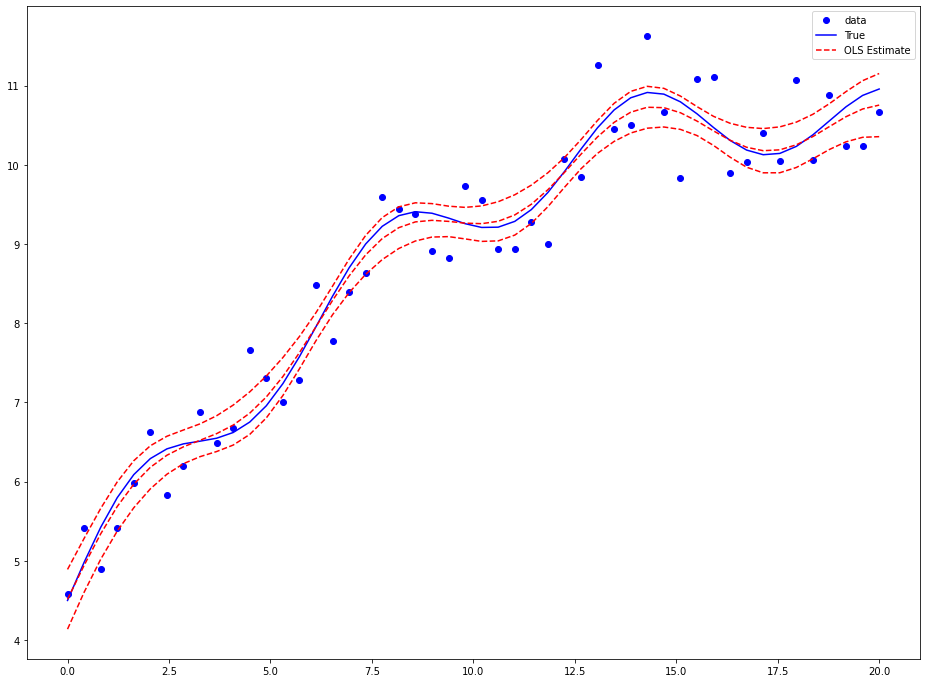

In [131]:
fig, ax = plt.subplots(figsize=(16,12))

ax.plot(x, y, "bo", label='data')
ax.plot(x, y_true, 'b-', label='True')
ax.plot(x, res.fittedvalues, 'r--', label='OLS Estimate')
ax.plot(x, interval_l, 'r--')
ax.plot(x, interval_u, 'r--')

ax.legend(loc="best")

## Via stats models (actual data)

In [58]:
import numpy as np
import statsmodels.api as sm

In [65]:
spector_data = sm.datasets.spector.load()
spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

In [68]:
model = sm.OLS(spector_data.endog, spector_data.exog)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Sun, 05 Nov 2023   Prob (F-statistic):            0.00157
Time:                        10:26:29   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

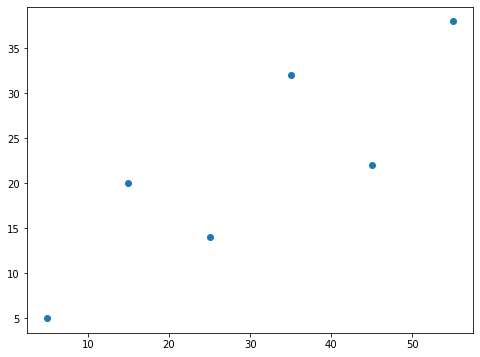

In [83]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, "o", label='data' );
ax.plot(x, y_)